<a href="https://colab.research.google.com/github/Rajneessh/ImageClassifierNN/blob/main/ImageClassifierCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


In [3]:

X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
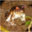

In [7]:
X_train[0]

In [8]:
classes = ['airplane','automobile','bird','cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck' ]

In [9]:
def plot_sample(X, y , index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

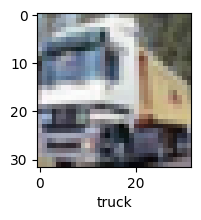

In [10]:
plot_sample(X_train,y_train, 1)

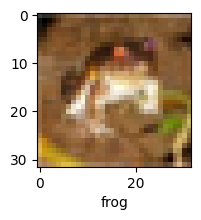

In [11]:
plot_sample(X_train, y_train, 0)

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

## <center>Artificial Neural Network</center>

In [54]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
])

In [55]:
from tensorflow.keras.optimizers import Adam

ann.compile(
    optimizer=Adam(learning_rate = 0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_3 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_4 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs=5, batch_size =32)

Epoch 1/5
1563/1563 [==============================] - 14s 6ms/step - loss: 1.7912 - accuracy: 0.3574
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5997 - accuracy: 0.4329
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4986 - accuracy: 0.4679
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4403 - accuracy: 0.4868
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3836 - accuracy: 0.5090


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4052 - accuracy: 0.4982


[1.4052369594573975, 0.498199999332428]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.55      0.56      1000
           1       0.62      0.59      0.61      1000
           2       0.46      0.26      0.33      1000
           3       0.36      0.36      0.36      1000
           4       0.41      0.47      0.44      1000
           5       0.47      0.32      0.38      1000
           6       0.50      0.57      0.54      1000
           7       0.59      0.54      0.57      1000
           8       0.48      0.76      0.59      1000
           9       0.52      0.56      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



## <center>Convolutional Neural Network</center>

In [13]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),


        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),

        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),
])

In [14]:
from tensorflow.keras.optimizers import Adam
cnn.compile(optimizer=Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0

### <center>Model 1</center>

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9806 - accuracy: 0.6582
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9698 - accuracy: 0.6631
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9615 - accuracy: 0.6650
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9522 - accuracy: 0.6675
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9456 - accuracy: 0.6700
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9373 - accuracy: 0.6753
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9243 - accuracy: 0.6809
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9223 - accuracy: 0.6790
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9141 - accuracy: 0.6812
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.905

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9026 - accuracy: 0.6903


[0.902553915977478, 0.6902999877929688]

### Model 2

In [ ]:
cnn.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
3125/3125 [==============================] - 17s 6ms/step - loss: 1.2145 - accuracy: 0.5711
Epoch 2/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1772 - accuracy: 0.5854
Epoch 3/10
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1446 - accuracy: 0.5979
Epoch 4/10
3125/3125 [==============================] - 14s 4ms/step - loss: 1.1183 - accuracy: 0.6064
Epoch 5/10
3125/3125 [==============================] - 20s 6ms/step - loss: 1.0935 - accuracy: 0.6154
Epoch 6/10
3125/3125 [==============================] - 21s 7ms/step - loss: 1.0702 - accuracy: 0.6253
Epoch 7/10
3125/3125 [==============================] - 21s 7ms/step - loss: 1.0507 - accuracy: 0.6346
Epoch 8/10
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0348 - accuracy: 0.6386
Epoch 9/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.0166 - accuracy: 0.6463
Epoch 10/10
3125/3125 [==============================] - 13s 4ms/step - l

In [ ]:
cnn.evaluate(X_test, y_test)

### Model 3

In [17]:
cnn.fit(X_train, y_train, epochs=40, batch_size=16)

Epoch 1/40
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0051 - accuracy: 0.6495
Epoch 2/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9912 - accuracy: 0.6544
Epoch 3/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9795 - accuracy: 0.6589
Epoch 4/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9657 - accuracy: 0.6630
Epoch 5/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9524 - accuracy: 0.6672
Epoch 6/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9445 - accuracy: 0.6725
Epoch 7/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9326 - accuracy: 0.6737
Epoch 8/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9212 - accuracy: 0.6803
Epoch 9/40
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9116 - accuracy: 0.6804
Epoch 10/40
3125/3125 [==============================] - 12s 4ms/step - l

In [18]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8154 - accuracy: 0.7187


[0.8153817653656006, 0.7186999917030334]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      1000
           1       0.81      0.85      0.83      1000
           2       0.64      0.60      0.62      1000
           3       0.58      0.45      0.51      1000
           4       0.70      0.65      0.67      1000
           5       0.57      0.69      0.62      1000
           6       0.78      0.82      0.80      1000
           7       0.77      0.78      0.77      1000
           8       0.78      0.83      0.81      1000
           9       0.84      0.73      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



## <center>Further Prediction</center>

In [20]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.38709357e-03, 5.92615339e-04, 2.89012324e-02, 7.40951240e-01,
        2.24844669e-03, 2.00310528e-01, 3.06372973e-03, 1.57957300e-04,
        1.69947706e-02, 3.92402610e-04],
       [9.44871455e-03, 3.61622423e-02, 7.06781202e-06, 7.97787322e-07,
        3.69112172e-07, 3.05511811e-08, 1.64346350e-08, 1.86010240e-07,
        9.53905523e-01, 4.75106877e-04],
       [1.62891731e-01, 5.72371967e-02, 2.79226247e-03, 3.83676426e-03,
        5.33331069e-04, 7.64906988e-04, 1.21242345e-04, 1.47541577e-04,
        7.41700411e-01, 2.99745966e-02],
       [6.99321151e-01, 4.52211387e-02, 3.65825184e-02, 1.46799430e-03,
        3.99780041e-03, 1.49078551e-04, 1.18917902e-04, 8.63429232e-05,
        2.09354967e-01, 3.70008405e-03],
       [5.81858467e-06, 2.94160098e-04, 1.38521241e-02, 4.75220084e-02,
        5.08329809e-01, 2.86355894e-02, 4.00749952e-01, 1.65018457e-04,
        4.33318230e-04, 1.22668798e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

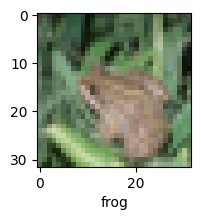

In [25]:
plot_sample(X_test, y_test, 4)

In [26]:
classes[y_classes[4]]

'deer'

## Export the Model

In [27]:
cnn.save('CNN_CifarDataset.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

In [28]:
loaded_model = tf.keras.models.load_model('CNN_Cifar10Dataset.h5')

In [43]:
loss, accuracy = loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8154 - accuracy: 0.7187


In [44]:
accuracy = round(accuracy,4)
print(accuracy)

0.7187


In [45]:
print(f'Loss: {loss:.4f} \nTest Accuracy: {accuracy*100}%')

Loss: 0.8154 
Test Accuracy: 71.87%


In [46]:
from tensorflow.keras.preprocessing import image

def predict_new_images(image_path):
  img = image.load_img(image_path, target_size=(32,32))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  predictions = loaded_model.predict(img_array)
  predicted_class = np.argmax(predictions)
  return predicted_class


In [47]:
predicted_class = predict_new_images('/content/Cat.jpeg')
print(f'Predicted Class: {classes[predicted_class]}')

1/1 [==============================] - 0s 241ms/step
Predicted Class: cat


In [49]:
predicted_class = predict_new_images('/content/airplane.jpg')
print(f'Predicted Class: {classes[predicted_class]}')

1/1 [==============================] - 0s 26ms/step
Predicted Class: airplane


In [50]:
predicted_class = predict_new_images('/content/dog.jpg')
print(f'Predicted Class: {classes[predicted_class]}')

1/1 [==============================] - 0s 26ms/step
Predicted Class: horse


In [51]:
predicted_class = predict_new_images('/content/frog.jpg')
print(f'Predicted Class: {classes[predicted_class]}')

1/1 [==============================] - 0s 90ms/step
Predicted Class: frog


In [52]:
predicted_class = predict_new_images('/content/truck.jpg')
print(f'Predicted Class: {classes[predicted_class]}')

1/1 [==============================] - 0s 26ms/step
Predicted Class: truck


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
